# Imports

In [ ]:
import tensorflow
from tensorflow.keras.layers import Input, Dense, SimpleRNN, LSTM, GRU, GlobalMaxPooling1D
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.models import Model
from tensorflow.keras.datasets import fashion_mnist

import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pyplot import style
from IPython.display import clear_output # For tidying up the code little bit when training.

style.use("dark_background")

In [ ]:
(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()
print(f"X_train.shape: {X_train.shape},\n\n X_test.shape:{X_test.shape}")

N, T, D = X_train.shape

X_train.shape: (60000, 28, 28),

 X_test.shape:(10000, 28, 28)


* The shape is N x H x W but we pretend that it is N x T x D

# 1. SimpleRNN

In [ ]:
i = Input(shape=(T, D))
x = SimpleRNN(10)(i)
x = Dense(10, activation="softmax")(x)

model = Model(i, x)
model.compile(optimizer=Adam(learning_rate=0.01),
              loss="sparse_categorical_crossentropy",
              metrics=["acc"])
history = model.fit(X_train, y_train,
                    validation_data=(X_test, y_test),
                    epochs=20)

Epoch 1/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 12s 6ms/step - acc: 0.4420 - loss: 1.4526 - val_acc: 0.4980 - val_loss: 1.2796
Epoch 2/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 19s 5ms/step - acc: 0.5037 - loss: 1.2673 - val_acc: 0.4979 - val_loss: 1.2613
Epoch 3/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - acc: 0.5084 - loss: 1.2570 - val_acc: 0.4997 - val_loss: 1.2774
Epoch 4/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - acc: 0.5076 - loss: 1.2558 - val_acc: 0.5243 - val_loss: 1.2153
Epoch 5/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - acc: 0.5287 - loss: 1.2089 - val_acc: 0.5392 - val_loss: 1.2096
Epoch 6/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 12s 6ms/step - acc: 0.5278 - loss: 1.2064 - val_acc: 0.5398 - val_loss: 1.1897
Epoch 7/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - acc: 0.5407 - loss: 1.1917 - val_acc: 0.5120 - val_loss: 1.2326
Epoch 8/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - acc: 0.5278 - loss: 1.2247 - val_acc: 0.5498 - val_loss: 1.1754
Epoch 9/20
1875/1875 ━━━━━━━━━━━

## 1.1 Loss Graph

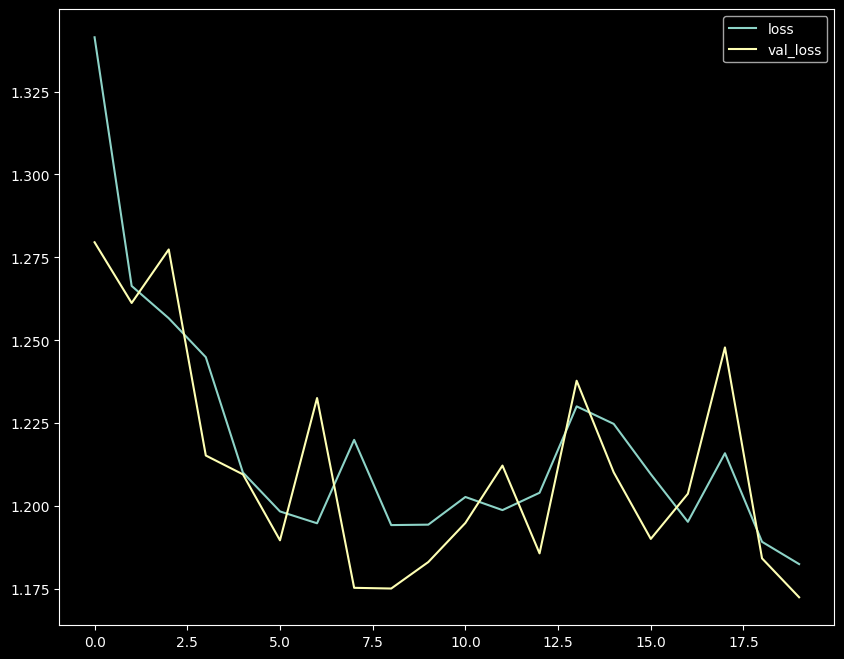

In [ ]:
plt.figure(figsize=(10, 8))
plt.plot(history.history["loss"], label="loss")
plt.plot(history.history["val_loss"], label="val_loss")
plt.legend()

## 1.2 Accuracy Graph

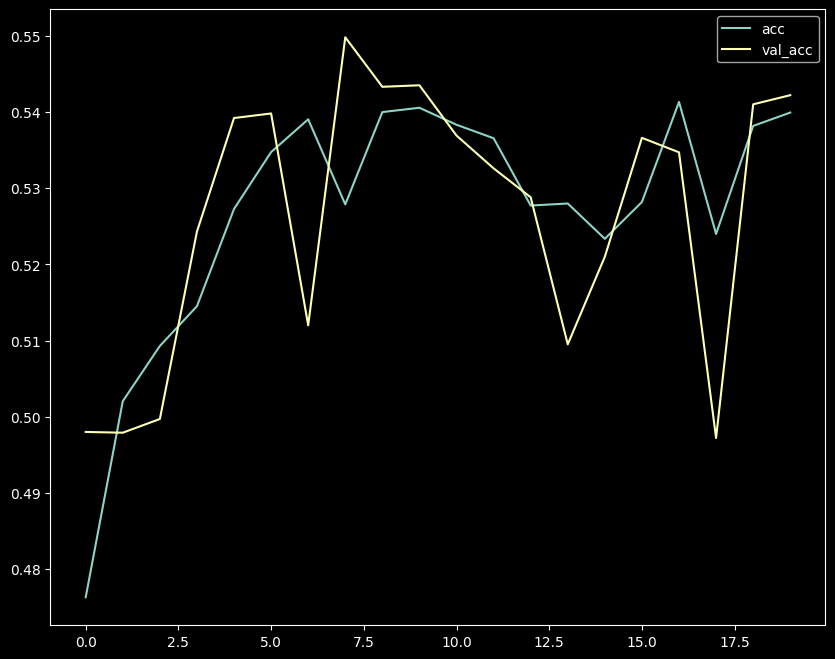

In [ ]:
plt.figure(figsize=(10, 8))
plt.plot(history.history["acc"], label="acc")
plt.plot(history.history["val_acc"], label="val_acc")
plt.legend()

# 2. LSTM

In [ ]:
i = Input(shape=(T, D))
x = LSTM(10)(i)
x = Dense(10, activation="softmax")(x)

model = Model(i, x)
model.compile(optimizer=Adam(learning_rate=0.01),
              loss="sparse_categorical_crossentropy",
              metrics=["acc"])
history = model.fit(X_train, y_train,
                    validation_data=(X_test, y_test),
                    epochs=20)

Epoch 1/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 12s 5ms/step - acc: 0.5166 - loss: 1.2695 - val_acc: 0.6568 - val_loss: 0.8861
Epoch 2/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 19s 5ms/step - acc: 0.6660 - loss: 0.8597 - val_acc: 0.6980 - val_loss: 0.7986
Epoch 3/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - acc: 0.6956 - loss: 0.8055 - val_acc: 0.6942 - val_loss: 0.8052
Epoch 4/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - acc: 0.7006 - loss: 0.7893 - val_acc: 0.6976 - val_loss: 0.8027
Epoch 5/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - acc: 0.6951 - loss: 0.7894 - val_acc: 0.7049 - val_loss: 0.7790
Epoch 6/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - acc: 0.7102 - loss: 0.7768 - val_acc: 0.6923 - val_loss: 0.8388
Epoch 7/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - acc: 0.6964 - loss: 0.8134 - val_acc: 0.7108 - val_loss: 0.7868
Epoch 8/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - acc: 0.7233 - loss: 0.7547 - val_acc: 0.7330 - val_loss: 0.7399
Epoch 9/20
1875/1875 ━━━━━━━━━━━━━━

## 2.1 Loss Graph


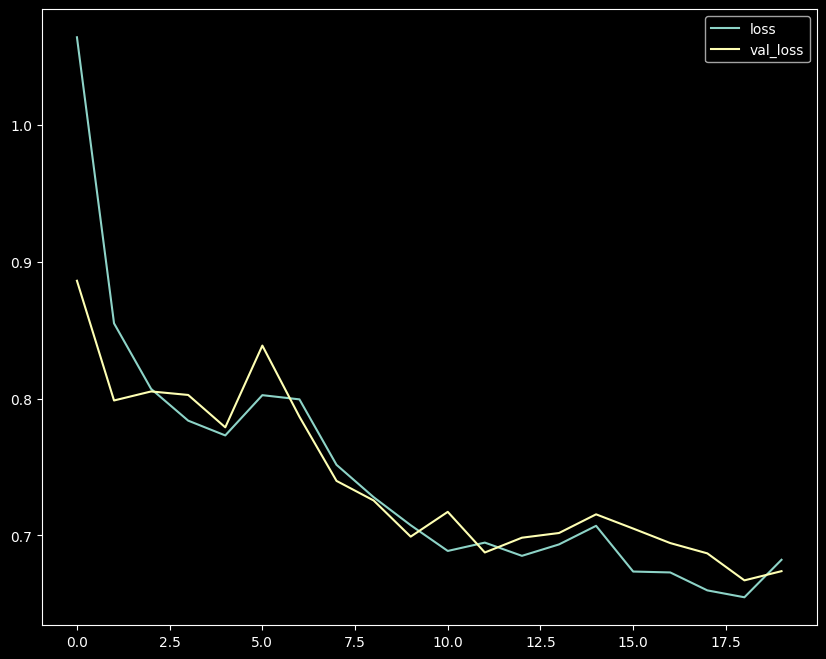

In [ ]:
plt.figure(figsize=(10, 8))
plt.plot(history.history["loss"], label="loss")
plt.plot(history.history["val_loss"], label="val_loss")
plt.legend()

## 2.2 Accuracy Graph

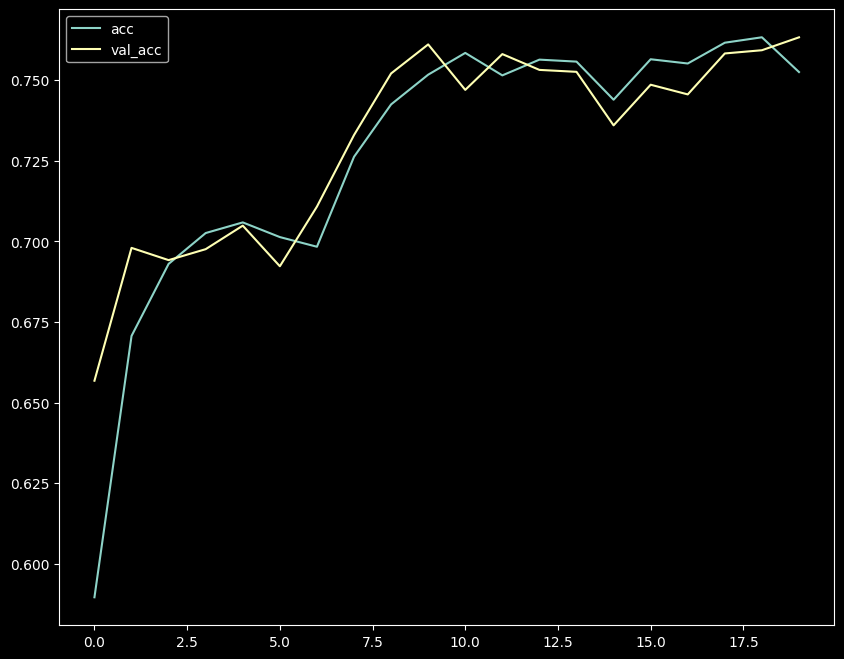

In [ ]:
plt.figure(figsize=(10, 8))
plt.plot(history.history["acc"], label="acc")
plt.plot(history.history["val_acc"], label="val_acc")
plt.legend()

## 2.3 Trying GlobalMaxPooling

In [ ]:
i = Input(shape=(T, D))
x = LSTM(10)(i)
x = GlobalMaxPooling1D()(x)
x = Dense(10, activation="softmax")(x)

model = Model(i, x)
model.compile(optimizer=Adam(learning_rate=0.01),
              loss="sparse_categorical_crossentropy",
              metrics=["acc"])
history = model.fit(X_train, y_train,
                    validation_data=(X_test, y_test),
                    epochs=10)

ValueError: Input 0 of layer "global_max_pooling1d" is incompatible with the layer: expected ndim=3, found ndim=2. Full shape received: (None, 10)

### 2.3.1 Loss Graph

In [ ]:
plt.figure(figsize=(10, 8))
plt.plot(history.history["loss"], label="loss")
plt.plot(history.history["val_loss"], label="val_loss")
plt.legend()

### 2.3.1 Accuracy Graph

In [ ]:
plt.figure(figsize=(10, 8))
plt.plot(history.history["acc"], label="acc")
plt.plot(history.history["val_acc"], label="val_acc")
plt.legend()

## 2.4 Trying GlobalMaxPooling also with diff LSTM unit size

In [ ]:
i = Input(shape=(T, D))
x = LSTM(30)(i)
x = GlobalMaxPooling1D()(x)
x = Dense(10, activation="softmax")(x)

model = Model(i, x)
model.compile(optimizer=Adam(learning_rate=0.01),
              loss="sparse_categorical_crossentropy",
              metrics=["acc"])
history = model.fit(X_train, y_train,
                    validation_data=(X_test, y_test),
                    epochs=10)

In [ ]:
plt.figure(figsize=(10, 8))
plt.plot(history.history["loss"], label="loss")
plt.plot(history.history["val_loss"], label="val_loss")
plt.legend()

In [ ]:
plt.figure(figsize=(10, 8))
plt.plot(history.history["acc"], label="acc")
plt.plot(history.history["val_acc"], label="val_acc")
plt.legend()

# 3. GRU

In [ ]:
i = Input(shape=(T, D))
x = GRU(10)(i)
x = Dense(10, activation="softmax")(x)

model = Model(i, x)
model.compile(optimizer=Adam(learning_rate=0.01),
              loss="sparse_categorical_crossentropy",
              metrics=["acc"])
history = model.fit(X_train, y_train,
                    validation_data=(X_test, y_test),
                    epochs=20)

## 3.1 Loss Graph

In [ ]:
plt.figure(figsize=(10, 8))
plt.plot(history.history["loss"], label="loss")
plt.plot(history.history["val_loss"], label="val_loss")
plt.legend()

## 3.2 Accuracy Graph

In [ ]:
plt.figure(figsize=(10, 8))
plt.plot(history.history["acc"], label="acc")
plt.plot(history.history["val_acc"], label="val_acc")
plt.legend()